***
# `Project:` Prevendo a <font color='blue'>morte</font> ou <font color='blue'>vida</font> de pacientes com hepatite

## `Date:` fevereiro, 2022

## `Data Scientist:` Walter Trevisan
***

# `Análise Exploratória(EDA)-Etapa 1`

Nesta etapa, vamos realizar a **`Análise Exploratória`** dos dados, utilizando o *dataset* de treinamento que foi preparado na etapa anterior, ou seja, o *data frame* que foi salvo no arquivo **`strat_train_set.pkl`**.

Então, vamos realizar as seguintes atividades:

1. **Carregar** o *data frame* de treinamento, salvo no arquivo **`strat_train_set.pkl`**;

2. **Entender** as informações e os tipos de dados;

3. **Preparar** os **dados** de acordo com o contexto do projeto;

4. **Analisar** e **tratar** os **valores ausentes** para as variáveis **categóricas** e **numéricas**;

5. **Realizar** uma **análise univariada** das variáveis **categóricas**;

6. **Salvar** o *dataframe* de treinamento modificado;

7. **Salvar** os objetos utilizados nos processos de **imputação univariada** e **imputação múltipla**.

8. **Conclusões** desta etapa;

## <font color='blue'>Setup</font>

Primeiro, vamos carregar os **pacotes e funções** que serão utilizadas neste **notebook**.

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Importa função para verificarmos a versão da linguagem python:
from platform import python_version

# Importando o pacote NumPy:
import numpy as np
# Importando o pacote Pandas:
import pandas as pd
# Importando o pacote Scipy:
import scipy

# Importando o pacote do Scikit-Learn:
import sklearn as skl 
# Funções para tratamento de valores ausentes e outliers:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
# Define o "seed" para reproduzir os mesmos resultados no tratamento
# de valores ausentes para as variáveis numéricas:
SEED = 42

# Importando pacotes para visualização de gráficos:
import matplotlib as mpl
import matplotlib.pyplot as plt
# Importa o pacote "seaborn" para criarmos gráficos estatísticos:
import seaborn as sns
%matplotlib inline

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Gráficos, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
ROOT_DIR = "."

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
OBJ_PATH = os.path.join(ROOT_DIR, "objects")
# Criando o diretório, se ele não existir:
os.makedirs(OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "objetos" (Data Frames) do Projeto:
DATA_PATH = os.path.join(ROOT_DIR, "data")
# Criando o diretório, se ele não existir:
os.makedirs(DATA_PATH, exist_ok=True)

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) do Projeto:
GRAPHICS_PATH = os.path.join(ROOT_DIR, "images", "graphics")
# Criando o diretório, se ele não existir:
os.makedirs(GRAPHICS_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
LIB_PATH = os.path.join(ROOT_DIR, "library")

# Adicionando o diretório "./library" ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "data_science_library.py":
import data_science_library as dslib

# Importando para este notebook, as classes e funções definidas no módulo "plot_library.py":
import plot_library as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "project_library.py":
import project_library as pjlib

# Criando um objeto para calularmos o tempo gasto no processo de "imputação múltipla"
# das variáveis numéricas:
ept = dslib.ElapsedTime(builder_msg=False)

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
print("Versões dos pacotes usados neste jupyter notebook:")
print("Python      : {}".format(python_version()))
print("Numpy       : {}".format(np.__version__))
print("Pandas      : {}".format(pd.__version__))
print("Scipy       : {}".format(scipy.__version__))
print("Matplotlib  : {}".format(mpl.__version__))
print("Seaborn     : {}".format(sns.__version__))
print("Scikit-Learn: {}".format(skl.__version__))

Versões dos pacotes usados neste jupyter notebook:
Python      : 3.8.12
Numpy       : 1.19.5
Pandas      : 1.3.5
Scipy       : 1.7.3
Matplotlib  : 3.4.3
Seaborn     : 0.11.2
Scikit-Learn: 1.0.2


## <font color='blue'>1- Carregar o *data frame* de treinamento: `strat_train_set.pkl`</font>

In [3]:
# Carregando o objeto (data frame) "strat_train_set":
train_df = dslib.pickle_object_load(
    path=DATA_PATH, file="strat_train_set.pkl",
    msg="O arquivo 'strat_train_set.pkl' (data frame) foi carregado com sucesso!"
)

O arquivo 'strat_train_set.pkl' (data frame) foi carregado com sucesso!


## <font color='blue'>2- Entender as informações e os tipos de dados do *dataset*</font>

Visualizando os primeiros 10 registros do nosso *dataset*:

In [4]:
# Visualizando os primeiros 10 registros:
train_df.head(10)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,1,48,1,1,2,1,1,2,2,1,2,1,1,1,4.80,123,157,2.7,31,2
1,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
2,2,20,2,1,2,1,1,1,1,1,1,1,2,2,2.30,150,68,3.9,?,1
3,2,34,2,1,1,2,2,2,2,1,2,2,2,2,0.60,30,24,4.0,76,1
4,2,58,2,2,2,1,2,2,2,1,2,1,2,2,1.40,175,55,2.7,36,1
5,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
6,2,22,2,2,1,1,2,2,2,2,2,2,2,2,0.90,48,20,4.2,64,1
7,2,23,1,2,2,2,2,2,?,?,?,?,?,?,4.60,56,16,4.6,?,1
8,2,33,1,2,2,2,2,2,?,?,2,2,2,2,1.00,?,60,4.0,?,2
9,2,37,1,1,2,1,1,1,2,2,2,2,2,2,0.80,92,59,?,?,1


In [5]:
# Obtendo um resumo dos dados:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           124 non-null    int64 
 1   Age             124 non-null    int64 
 2   Gender          124 non-null    int64 
 3   Steroid         124 non-null    object
 4   Antivirals      124 non-null    int64 
 5   Fatigue         124 non-null    object
 6   Malaise         124 non-null    object
 7   Anorexia        124 non-null    object
 8   LiverBig        124 non-null    object
 9   LiverFirm       124 non-null    object
 10  SpleenPalpable  124 non-null    object
 11  Spiders         124 non-null    object
 12  Ascites         124 non-null    object
 13  Varices         124 non-null    object
 14  Bilirubin       124 non-null    object
 15  AlkPhosphate    124 non-null    object
 16  SGOT            124 non-null    object
 17  Albumin         124 non-null    object
 18  Protime   

**Análise:**

* o nosso *dataset* de treinamento (`train_df`) possui um total de **124** observações, com **19** atributos (variáveis explicativas) e a nossa variável ***target*** (**`Class`**);

* temos **`6`** variáveis explicativas **numéricas**: **`Age`**, **`Bilirubin`**, **`AlkPhosphate`**, **`SGOT`**, **`Albumin`**, e **`Protime`**;

* temos **`13`** variáveis explicativas **categóricas**: **`Gender`**, **`Steroid`**, **`Antivirals`**, **`Fatigue`**, **`Malaise`**, **`Anorexia`**, **`LiverBig`**, **`LiverFirm`**, **`SpleenPalpable`**, **`Spiders`**, **`Ascites`**, **`Varices`**, e **`Histology`**;

* todas as variáveis **categóricas** são **binárias**, ou seja, possuem **2 categorias**. Estas variáveis estão representadas pelas categorias **1** e **2**. Para um melhor entendimento, vamos substituir estas classes por **valores nominais**;

* a grande maioria das variáveis explicativas possuem alguns valores iguais a **`?`**, ou seja, são valores ausentes (*missing values*) que precisarão ser tratados.

## <font color='blue'>3- Preparar os `dados` de acordo com o contexto do projeto</font>

### Preparando as variáveis categóricas e numéricas

In [6]:
# Preparando as variáveis categóricas e numéricas:
data_df = pjlib.data_prep_step_1(df=train_df, target=True)

### Analisando os resultados

In [7]:
# Obtendo um resumo dos dados:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           124 non-null    object 
 1   Age             124 non-null    float64
 2   Gender          124 non-null    object 
 3   Steroid         124 non-null    object 
 4   Antivirals      124 non-null    object 
 5   Fatigue         123 non-null    object 
 6   Malaise         123 non-null    object 
 7   Anorexia        123 non-null    object 
 8   LiverBig        114 non-null    object 
 9   LiverFirm       113 non-null    object 
 10  SpleenPalpable  119 non-null    object 
 11  Spiders         119 non-null    object 
 12  Ascites         119 non-null    object 
 13  Varices         119 non-null    object 
 14  Bilirubin       119 non-null    float64
 15  AlkPhosphate    101 non-null    float64
 16  SGOT            121 non-null    float64
 17  Albumin         112 non-null    flo

In [8]:
# Visualizando os primeiros 10 registros:
data_df.head(10)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,DIE,48.0,male,no,yes,no,no,yes,yes,no,yes,no,no,no,48.0,123.0,157.0,27.0,31.0,yes
1,LIVE,39.0,male,no,no,yes,yes,yes,no,no,yes,yes,yes,yes,13.0,78.0,30.0,44.0,85.0,no
2,LIVE,20.0,female,no,yes,no,no,no,no,no,no,no,yes,yes,23.0,150.0,68.0,39.0,NaN,no
3,LIVE,34.0,female,no,no,yes,yes,yes,yes,no,yes,yes,yes,yes,6.0,30.0,24.0,40.0,76.0,no
4,LIVE,58.0,female,yes,yes,no,yes,yes,yes,no,yes,no,yes,yes,14.0,175.0,55.0,27.0,36.0,no
5,LIVE,50.0,male,no,yes,no,yes,yes,no,yes,yes,yes,yes,yes,9.0,135.0,42.0,35.0,NaN,no
6,LIVE,22.0,female,yes,no,no,yes,yes,yes,yes,yes,yes,yes,yes,9.0,48.0,20.0,42.0,64.0,no
7,LIVE,23.0,male,yes,yes,yes,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,46.0,56.0,16.0,46.0,NaN,no
8,LIVE,33.0,male,yes,yes,yes,yes,yes,NaN,NaN,yes,yes,yes,yes,10.0,NaN,60.0,40.0,NaN,yes
9,LIVE,37.0,male,no,yes,no,no,no,yes,yes,yes,yes,yes,yes,8.0,92.0,59.0,NaN,NaN,no


**Análise:** agora o nosso *dataset* está com as informações aderentes ao contexto do projeto.

## <font color='blue'>4- Análise e tratamento de valores ausentes *`missing values`*</font>

### 4.1- Tratamento das observações (`index`) com valores `NaN`

Primeiro, vamos verificar a quantidade (%) de *missing values* em cada observação do nosso dataframe. Valore iguais ou acima de **50%** serão eliminados para não criarmos um *viés* nos dados, porque a maioria dos atributos possuem valores ausentes (`NaN`).

In [9]:
# Verificando os valores ausentes:
df_mv = dslib.missing_values(data=data_df, axis=1, threshold=0.50, target='Class')

# Visualizando os valores ausentes:
data_df.loc[df_mv.index,]

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
19,LIVE,34.0,male,no,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [10]:
# Removendo a observação (index) do data frame:
data_df.drop(index=list(df_mv.index), inplace=True)
# Reset dos índices:
data_df.reset_index(drop=True, inplace=True)

### 4.2- Tratamento das variáveis (`columns`) com valores `NaN`

Em seguida, vamos verificar a quantidade (%) de *missing values* em cada variável do nosso dataframe. Valore iguais ou acima de **50%** serão eliminados para não criarmos um *viés* nos dados, porque a maioria das informações sobre a variável possuem valores ausentes (`NaN`).

Neste análise, vamos separar as variáveis em **categóricas** e **numéricas**. 

### 4.2.1- Tratamento das variáveis `categóricas`

In [11]:
# Separando as variáveis categóricas:
var = (data_df.dtypes == 'object')
var_cat = list(var[var == True].index)
data_cat_df = data_df.loc[:, var_cat]
# Verificando as variáveis com "missing values":
df_mv = dslib.missing_values(data=data_cat_df, axis=0, threshold=0.01, target='Class')
print('Quantidade de variáveis: {}'.format(len(df_mv)))
df_mv

Quantidade de variáveis: 6


Attributes (Columns),Total,Percent
LiverFirm,10,0.081301
LiverBig,9,0.073171
SpleenPalpable,4,0.032520
Spiders,4,0.032520
Ascites,4,0.032520
Varices,4,0.032520


Temos **6 variáveis** com valores ausentes. Vamos analisar a quantidade de observações em que esses valores estão ausentes:

In [12]:
# Observações com missing values:
df_mv = dslib.missing_values(data=data_cat_df, axis=1, threshold=0.01, target='Class')
print('Quantidade de observações: {}'.format(len(df_mv)))
df_mv

Quantidade de observações: 11


Observations (Index),Total,Percent
93,6,0.461538
112,6,0.461538
7,6,0.461538
97,4,0.307692
73,2,0.153846
23,2,0.153846
21,2,0.153846
80,2,0.153846
8,2,0.153846
70,2,0.153846


In [13]:
# Visualizando todos os registros:
data_cat_df.loc[df_mv.index, :]

,Class,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology
93,DIE,male,no,yes,no,no,no,NaN,NaN,NaN,NaN,NaN,NaN,yes
112,LIVE,male,yes,yes,no,no,no,NaN,NaN,NaN,NaN,NaN,NaN,no
7,LIVE,male,yes,yes,yes,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,no
97,LIVE,female,no,yes,no,no,yes,yes,yes,NaN,NaN,NaN,NaN,no
73,LIVE,male,yes,yes,no,no,no,NaN,NaN,yes,no,no,yes,yes
23,DIE,male,no,yes,no,no,yes,NaN,NaN,no,yes,no,yes,yes
21,DIE,male,no,yes,no,no,yes,NaN,NaN,yes,yes,yes,yes,no
80,DIE,male,no,yes,no,no,yes,NaN,NaN,yes,no,yes,yes,yes
8,LIVE,male,yes,yes,yes,yes,yes,NaN,NaN,yes,yes,yes,yes,yes
70,DIE,male,no,yes,no,yes,yes,NaN,NaN,no,no,no,yes,yes


Embora sejam apenas **11 observações** com valores ausentes (`NaN`) não vamos optar inicialmente pela remoção das linhas porque temos um *dataset* com poucas observações para análise. Sabemos que essas variáveis possuem apenas 2 classes (categorias), e por isso não vamos substituí-los por uma nova categoria (por exemplo, **`unknown`**). Portanto, a nossa estratégia para o tratamento desses valores ausentes será substituí-los pela **moda** (medida estatística que calcula a classe com a **maior frequência** nos dados).

Então, vamos utilizar a função `SimpleImputer` para realizar a substituição dos valores ausentes.

In [14]:
# Criando uma instância para substituição dos valores ausentes através da "imputação univariada",
# para as variáveis categóricas:
imputer_cat = SimpleImputer(strategy="most_frequent")

In [15]:
# Primeiro vamos separar a variável "target":
target = data_cat_df[['Class']]
# Eliminando a variável "target" do dataframe:
data_cat = data_cat_df.drop(columns='Class')
# Substituindo os valores ausentes:
data_cat_tf = imputer_cat.fit_transform(data_cat)
# Remontando o dataframe original sem os valores ausentes:
data_cat_df = pd.concat(
    [target,
     pd.DataFrame(data_cat_tf, columns=data_cat.columns)
    ],
    axis=1
)
# Verificando se os "missing values" foram removidos:
df_mv = dslib.missing_values(data=data_cat_df, axis=0, threshold=0.01, target='Class')
print('Quantidade de variáveis: {}'.format(len(df_mv)))
df_mv

Quantidade de variáveis: 0


Attributes (Columns),Total,Percent


**Análise:** podemos observar que os valores ausentes foram removidos das variáveis categóricas!

### 4.2.2- Tratamento das variáveis `numéricas`

In [16]:
# Separando as variáveis numéricas:
var = (data_df.dtypes == 'float64')
var_num = list(var[var == True].index)
data_num_df = data_df.loc[:, var_num]
# Verificando variáveis com valores iguais a "0":
# Criando um índice de todos os valores iguais a "0":
index = data_num_df.values == 0
data_num_df.loc[index,:]

,Age,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime
22,54.0,10.0,85.0,30.0,45.0,0.0


A variável `Protime` significa **tempo de protrombina (TP)**. O tempo de protrombina ou TP é um exame de sangue que avalia a capacidade do sangue para coagular, isto é, o tempo necessário para estancar uma hemorragia, por exemplo. O valor de referência do **tempo de protrombina** para uma pessoa saudável deve variar entre **10 e 14 segundos**.

Portanto, neste caso o valor **0.0** é considerado um valor ausente e será substituido por `NaN` para ser tratado.

In [17]:
# Substituindo o valores "0.0" para "NaN":
data_num_df.replace({'Protime': {0.0: np.nan}}, inplace=True)
# Verificando se o valor "0.0" foi substituido:
data_num_df.loc[index,:]

,Age,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime
22,54.0,10.0,85.0,30.0,45.0,NaN


In [18]:
# Verificando as variáveis com "missing values":
df_mv = dslib.missing_values(data=data_num_df, axis=0, threshold=0.01, target=None)
print('Quantidade de variáveis: {}'.format(len(df_mv)))
df_mv

Quantidade de variáveis: 5


Attributes (Columns),Total,Percent
Protime,53,0.430894
AlkPhosphate,22,0.178862
Albumin,11,0.089431
Bilirubin,4,0.032520
SGOT,2,0.016260


Temos **5 variáveis** com valores ausentes. Vamos analisar a quantidade de observações em que esses valores estão ausentes:

In [19]:
# Verificando as observações com missing values:
df_mv = dslib.missing_values(data=data_num_df, axis=1, threshold=0.01, target=None)
print('Quantidade de observações: {}'.format(len(df_mv)))

Quantidade de observações: 56


Temos **56 observações** com valores ausentes (`NaN`), ou seja, quase metade do nosso *dataset*. Então, não vamos optar pela remoção das linhas porque ficaríamos com poucas observações para análise. Também não iremos substituir os valores ausentes pela **média ou mediana** (medidas estatísticas) para não criarmos um *viés* nos dados. Portanto, para o tratamento desses valores ausentes utilizaremos o método da **imputação**.

A **imputação** é um método que é frequentemente usado quando se trata de **dados ausentes** (*missing values*). Há várias técnicas de imputação. Uma que é frequentemente utilizada, mas que vem com um forte *viés*, é a simples substituição pela média, onde todos os valores ausentes são substituídos pela média das variáveis. Uma melhor alternativa, e método de imputação mais robusto, é a **imputação múltipla**. Na imputação múltipla, os valores ausentes são substituídos por **M** estimativas plausíveis recuperadas de um modelo de previsão. A variável que possui o **valor ausente** torna-se a variável dependente de um modelo de previsão (por exemplo, regressão, random forest etc.), e é estimado com base nas informações restantes, ou seja, nos valores não ausentes em uma observação.

### Aplicando o método *`encoding`* nas variáveis `categóricas`

Entretanto, primeiro precisamos preparar as variáveis categóricas (preditivas) para serem utilizadas no processo de imputação mútipla. Então, utilizaremos uma técnica chamada **encoding** para preparar as variáveis categóricas porque, neste caso, todas as variáveis categóricas são *binárias*, ou seja, possuem apenas **2 classes ou categorias**. Para variáveis categóricas nominais com mais de 2 classes, utilizaríamos um outro método chamado *one-hot encoding* (desde que as variáveis tivessem uma **cardinalidade menor que 10**, seja, entre *3 e 9 categorias*).

In [20]:
# Definindo as variáveis categóricas preditivas:
cat_variables = ['Gender', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm',
                 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Histology']
# Criando uma cópia do dataset de treino que contém apenas os atributos categóricos:
var_cat_df = data_cat_df[cat_variables].copy(deep=True)

# Aplicando o método de codificação "encoding":
var_cat_enc_df = pjlib.method_encoding_categorical(df=var_cat_df, target=False)

# Resumo do dataframe transformado:
var_cat_enc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          123 non-null    int64
 1   Steroid         123 non-null    int64
 2   Antivirals      123 non-null    int64
 3   Fatigue         123 non-null    int64
 4   Malaise         123 non-null    int64
 5   Anorexia        123 non-null    int64
 6   LiverBig        123 non-null    int64
 7   LiverFirm       123 non-null    int64
 8   SpleenPalpable  123 non-null    int64
 9   Spiders         123 non-null    int64
 10  Ascites         123 non-null    int64
 11  Varices         123 non-null    int64
 12  Histology       123 non-null    int64
dtypes: int64(13)
memory usage: 12.6 KB


In [21]:
# Preparando um dataframe para aplicarmos a "imputação múltipla":
var_num_df = pd.concat([var_cat_enc_df, data_num_df], axis=1)
# Verificando o shape:
var_num_df.shape

(123, 19)

Para a **imputação múltipla** escolhi o algoritmo ([Extra-Trees Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html)) para ser o estimador.

In [22]:
# Define o imputer para tratamento dos "missing values":
imputer_mv = IterativeImputer(
    estimator=ExtraTreesRegressor(random_state=SEED),
    n_nearest_features=None,
    imputation_order='ascending',
    sample_posterior=False,
    random_state=SEED
)

# Início do processo:
ept.start(msg="Iniciando o processo de imputação...")
# Fit imputer and transform                          
imputer_mv.fit(var_num_df)
data_imp_tf = imputer_mv.transform(var_num_df)
ept.end(msg='Fim do processo:')

Iniciando o processo de imputação...
Fim do processo: 15.22 seconds.


In [23]:
# Cria um outro data frame:
var_num_df = pd.DataFrame(data_imp_tf, columns = var_num_df.columns)

# Resumo das informações:
var_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          123 non-null    float64
 1   Steroid         123 non-null    float64
 2   Antivirals      123 non-null    float64
 3   Fatigue         123 non-null    float64
 4   Malaise         123 non-null    float64
 5   Anorexia        123 non-null    float64
 6   LiverBig        123 non-null    float64
 7   LiverFirm       123 non-null    float64
 8   SpleenPalpable  123 non-null    float64
 9   Spiders         123 non-null    float64
 10  Ascites         123 non-null    float64
 11  Varices         123 non-null    float64
 12  Histology       123 non-null    float64
 13  Age             123 non-null    float64
 14  Bilirubin       123 non-null    float64
 15  AlkPhosphate    123 non-null    float64
 16  SGOT            123 non-null    float64
 17  Albumin         123 non-null    flo

In [24]:
# Resumo estatístico:
var_num_df.loc[:, list(data_num_df.columns)].describe()

,Age,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,41.268293,14.115610,108.406423,82.235122,38.424553,64.649106
std,12.676345,12.335455,49.982343,80.150597,6.562180,20.820203
min,7.000000,3.000000,26.000000,14.000000,22.000000,21.000000
25%,32.000000,8.000000,78.000000,31.000000,35.000000,49.000000
50%,39.000000,10.000000,92.930000,58.000000,40.000000,66.000000
75%,50.000000,15.000000,133.880000,95.000000,42.000000,79.010000
max,72.000000,80.000000,295.000000,528.000000,64.000000,100.000000


In [25]:
# Refazendo o dataframe original com todos os valores ausentes tratados:
data_df = pd.concat([data_cat_df, var_num_df.loc[:, list(data_num_df.columns)]], axis=1)

# Verificando se todos os valores ausentes foram tratados:
df_mv = dslib.missing_values(data=data_df, target='Class')
print('Quantidade de variáveis: {}'.format(len(df_mv)))
df_mv

Quantidade de variáveis: 19


Attributes (Columns),Total,Percent
Gender,0,0.0
Ascites,0,0.0
Albumin,0,0.0
SGOT,0,0.0
AlkPhosphate,0,0.0
Bilirubin,0,0.0
Age,0,0.0
Histology,0,0.0
Varices,0,0.0
Spiders,0,0.0


Pronto! Todos os valores ausentes (**missing values**) foram tratados e resolvidos. Podemos, agora, iniciar a nossa **análise univariada** das variáveis **categóricas**.

## <font color='blue'>5- Análise univariada das variáveis `categóricas`</font>

### <font color='red'>Class</font>

Esta é a variável *target* do projeto, ou seja, a variável que vamos **prever** se um paciente com **hepatite** irá **morrer** ou **viver**.

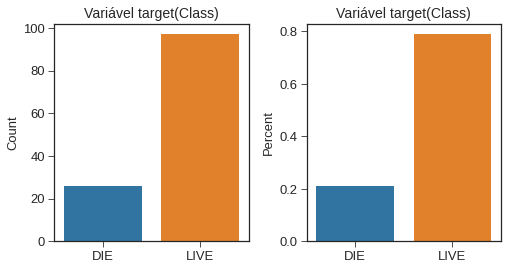

,Class,Total,Percent
0,DIE,26,0.2114
1,LIVE,97,0.7886


In [26]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=data_df, feature='Class', plot_style='seaborn-ticks',
    title='Variável target(Class)', title_fontsize=14, xlabel2_fontsize=13, ylabel_fontsize=13,
    xtick_labelsize=13, ytick_labelsize=13, columns_nr=2, rows_nr=1, share_x=False, share_y=False, width=8, height=4,
    wspace=0.3, hspace=None
)

**Análise:** podemos observar que os dados estão **desbalanceados**, ou seja, temos apenas **~21%** das observações para a classe **DIE** (paciente com hepatite morreu) e **~79%** para a classe **LIVE** (paciente com hepatite viveu).

Portanto, na etapa de modelagem deveremos realizar o **balanceamento** dos dados para que não fiquem com um *viés*, prejudicando o treinamento e criação do modelo preditivo.

### <font color='red'>Gender</font>

Esta variável preditora traz informações sobre o **gênero** do paciente.

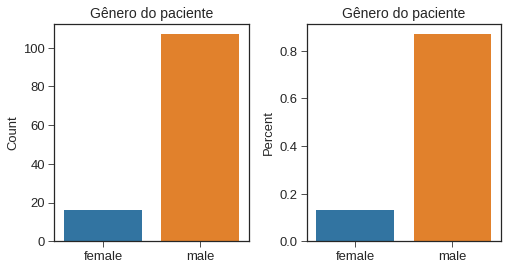

,Gender,Total,Percent
0,female,16,0.1301
1,male,107,0.8699


In [27]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=data_df, feature='Gender', plot_style='seaborn-ticks',
    title='Gênero do paciente', title_fontsize=14, xlabel2_fontsize=13, ylabel_fontsize=13,
    xtick_labelsize=13, ytick_labelsize=13, columns_nr=2, rows_nr=1, share_x=False, share_y=False, width=8, height=4,
    wspace=0.3, hspace=None
)

**Análise:** podemos observar que a grande maioria dos pacientes são do gênero **masculino** (**~87%**).

### <font color='red'>Steroid</font>

Esta variável preditora informa se o paciente utilizou (ou não) algum tipo de **esteróide**.

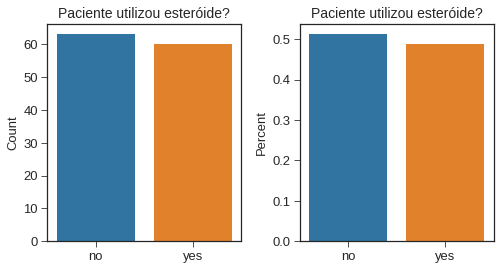

,Steroid,Total,Percent
0,no,63,0.5122
1,yes,60,0.4878


In [28]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=data_df, feature='Steroid', plot_style='seaborn-ticks',
    title='Paciente utilizou esteróide?', title_fontsize=14, xlabel2_fontsize=13, ylabel_fontsize=13,
    xtick_labelsize=13, ytick_labelsize=13, columns_nr=2, rows_nr=1, share_x=False, share_y=False, width=8, height=4,
    wspace=0.3, hspace=None
)

**Análise:** podemos observar que o *dataset* esta **balanceado** em relação aos pacientes que utilizaram(ou não) algum tipo de **esteróide**.

### <font color='red'>Antivirals</font>

Esta variável preditora informa se o paciente utilizou (ou não) algum tipo de medicamento **antiviral** para tratamento de infecções virais.

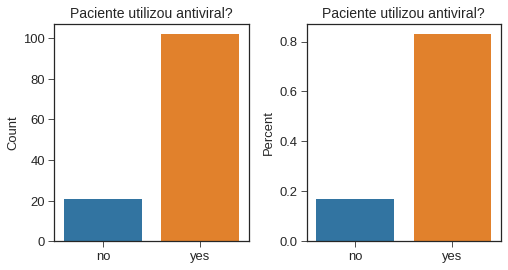

,Antivirals,Total,Percent
0,no,21,0.1707
1,yes,102,0.8293


In [29]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=data_df, feature='Antivirals', plot_style='seaborn-ticks',
    title='Paciente utilizou antiviral?', title_fontsize=14, xlabel2_fontsize=13, ylabel_fontsize=13,
    xtick_labelsize=13, ytick_labelsize=13, columns_nr=2, rows_nr=1, share_x=False, share_y=False, width=8, height=4,
    wspace=0.3, hspace=None
)

**Análise:** podemos observar que a grande maioria dos pacientes utilizaram algum medicamento **antiviral** (**~83%**) para tratamento de infecções virais.

### <font color='red'>Fatigue</font>

Esta variável preditora traz informações clínicas se o paciente apresentou (ou não) sinais de **fadiga**.

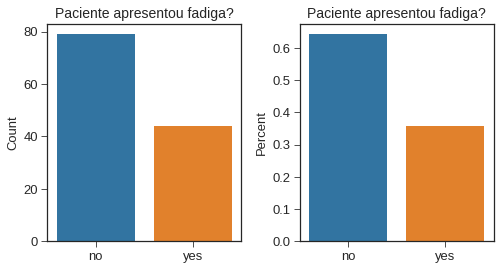

,Fatigue,Total,Percent
0,no,79,0.6423
1,yes,44,0.3577


In [30]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=data_df, feature='Fatigue', plot_style='seaborn-ticks',
    title='Paciente apresentou fadiga?', title_fontsize=14, xlabel2_fontsize=13, ylabel_fontsize=13,
    xtick_labelsize=13, ytick_labelsize=13, columns_nr=2, rows_nr=1, share_x=False, share_y=False, width=8, height=4,
    wspace=0.3, hspace=None
)

**Análise:** podemos observar que a maioria dos pacientes não apresentaram sinais clínicos de **fadiga** (**~64%**).

### <font color='red'>Malaise</font>

Esta variável preditora traz informações clínicas se o paciente apresentou (ou não) sinais de **mal-estar**.

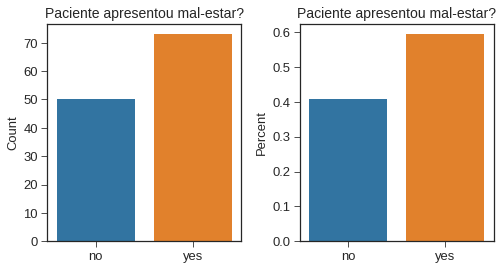

,Malaise,Total,Percent
0,no,50,0.4065
1,yes,73,0.5935


In [31]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=data_df, feature='Malaise', plot_style='seaborn-ticks',
    title='Paciente apresentou mal-estar?', title_fontsize=14, xlabel2_fontsize=13, ylabel_fontsize=13,
    xtick_labelsize=13, ytick_labelsize=13, columns_nr=2, rows_nr=1, share_x=False, share_y=False, width=8, height=4,
    wspace=0.3, hspace=None
)

**Análise:** podemos observar que a maioria dos pacientes apresentaram sinais clínicos de **mal-estar** (**~59%**).

### <font color='red'>Anorexia</font>

Esta variável preditora traz informações clínicas se o paciente possui (ou não) **anorexia**.

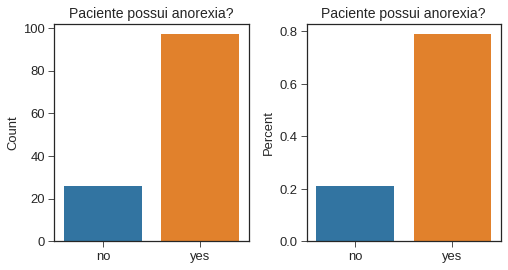

,Anorexia,Total,Percent
0,no,26,0.2114
1,yes,97,0.7886


In [32]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=data_df, feature='Anorexia', plot_style='seaborn-ticks',
    title='Paciente possui anorexia?', title_fontsize=14, xlabel2_fontsize=13, ylabel_fontsize=13,
    xtick_labelsize=13, ytick_labelsize=13, columns_nr=2, rows_nr=1, share_x=False, share_y=False, width=8, height=4,
    wspace=0.3, hspace=None
)

**Análise:** podemos observar que a grande maioria dos pacientes apresentaram **anorexia** (**~79%**), ou seja, são anoréxicos.

### <font color='red'>LiverBig</font>

Esta variável preditora traz informações clínicas se o paciente está (ou não) com o seu **fígado aumentado**.

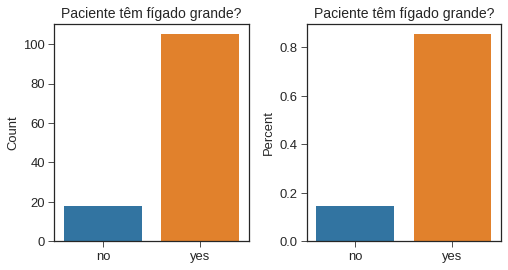

,LiverBig,Total,Percent
0,no,18,0.1463
1,yes,105,0.8537


In [33]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=data_df, feature='LiverBig', plot_style='seaborn-ticks',
    title='Paciente têm fígado grande?', title_fontsize=14, xlabel2_fontsize=13, ylabel_fontsize=13,
    xtick_labelsize=13, ytick_labelsize=13, columns_nr=2, rows_nr=1, share_x=False, share_y=False, width=8, height=4,
    wspace=0.3, hspace=None
)

**Análise:** podemos observar que a grande maioria dos pacientes apresentaram sinais clínicos de **fígado aumentado** (**~85%**).

### <font color='red'>LiverFirm</font>

Esta variável preditora traz informações clínicas se o paciente está (ou não) com o seu **fígado saudável**.

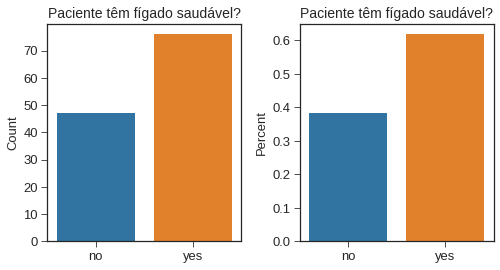

,LiverFirm,Total,Percent
0,no,47,0.3821
1,yes,76,0.6179


In [34]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=data_df, feature='LiverFirm', plot_style='seaborn-ticks',
    title='Paciente têm fígado saudável?', title_fontsize=14, xlabel2_fontsize=13, ylabel_fontsize=13,
    xtick_labelsize=13, ytick_labelsize=13, columns_nr=2, rows_nr=1, share_x=False, share_y=False, width=8, height=4,
    wspace=0.3, hspace=None
)

**Análise:** podemos observar que a maioria dos pacientes apresentaram sinais clínicos de **fígado saudável** (**~62%**).

### <font color='red'>SpleenPalpable</font>

Esta variável preditora traz informações clínicas se o paciente está (ou não) com o seu **baço aumentado**.

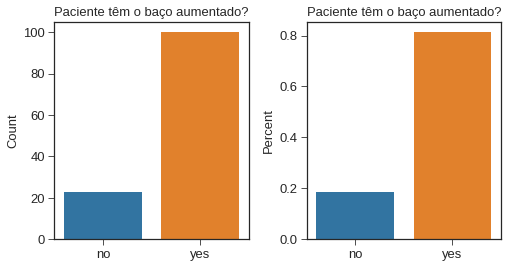

,SpleenPalpable,Total,Percent
0,no,23,0.187
1,yes,100,0.813


In [35]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=data_df, feature='SpleenPalpable', plot_style='seaborn-ticks',
    title='Paciente têm o baço aumentado?', title_fontsize=13, xlabel2_fontsize=13, ylabel_fontsize=13,
    xtick_labelsize=13, ytick_labelsize=13, columns_nr=2, rows_nr=1, share_x=False, share_y=False, width=8, height=4,
    wspace=0.3, hspace=None
)

**Análise:** podemos observar que a grande maioria dos pacientes apresentaram sinais clínicos de que estão com o **baço aumentado** (**~81%**).

### <font color='red'>Spiders</font>

Esta variável preditora traz informações clínicas se o paciente possui (ou não) **spider nevi**, ou seja, manchas de aranha pelo corpo.

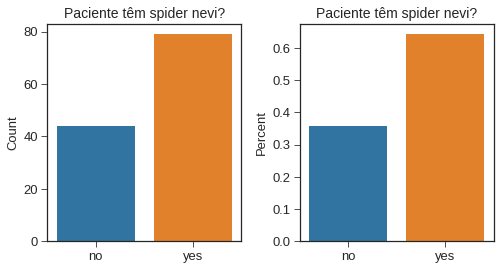

,Spiders,Total,Percent
0,no,44,0.3577
1,yes,79,0.6423


In [36]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=data_df, feature='Spiders', plot_style='seaborn-ticks',
    title='Paciente têm spider nevi?', title_fontsize=14, xlabel2_fontsize=13, ylabel_fontsize=13,
    xtick_labelsize=13, ytick_labelsize=13, columns_nr=2, rows_nr=1, share_x=False, share_y=False, width=8, height=4,
    wspace=0.3, hspace=None
)

**Análise:** podemos observar que a maioria dos pacientes apresentaram sinais clínicos de **spider nevi** (**~64%**).

### <font color='red'>Ascites</font>

Esta variável preditora traz informações clínicas se o paciente está (ou não) com **ascite** (também chamada de **barriga d'água**).

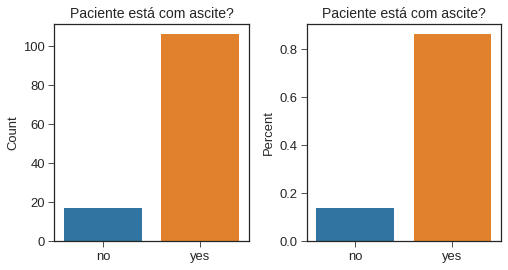

,Ascites,Total,Percent
0,no,17,0.1382
1,yes,106,0.8618


In [37]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=data_df, feature='Ascites', plot_style='seaborn-ticks',
    title='Paciente está com ascite?', title_fontsize=14, xlabel2_fontsize=13, ylabel_fontsize=13,
    xtick_labelsize=13, ytick_labelsize=13, columns_nr=2, rows_nr=1, share_x=False, share_y=False, width=8, height=4,
    wspace=0.3, hspace=None
)

**Análise:** podemos observar que a grande maioria dos pacientes apresentaram sinais clínicos de **ascite** (**~86%**).

### <font color='red'>Varices</font>

Esta variável preditora traz informações clínicas se o paciente possui (ou não) **varizes**.

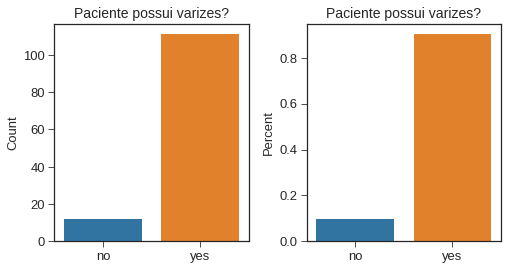

,Varices,Total,Percent
0,no,12,0.0976
1,yes,111,0.9024


In [38]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=data_df, feature='Varices', plot_style='seaborn-ticks',
    title='Paciente possui varizes?', title_fontsize=14, xlabel2_fontsize=13, ylabel_fontsize=13,
    xtick_labelsize=13, ytick_labelsize=13, columns_nr=2, rows_nr=1, share_x=False, share_y=False, width=8, height=4,
    wspace=0.3, hspace=None
)

**Análise:** podemos observar que a grande maioria dos pacientes apresentaram sinais clínicos de que possuem **varizes** (**~90%**).

### <font color='red'>Histology</font>

Esta variável preditora traz informações clínicas se o paciente realizou (ou não) o **diagnóstico** de doenças a partir de estudos comparativos entre tecidos saudáveis e doentes.

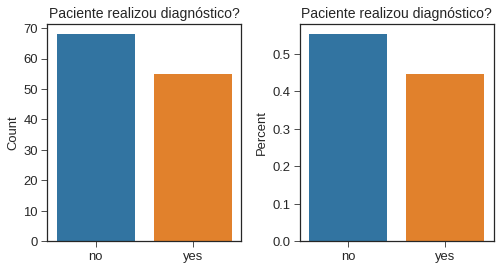

,Histology,Total,Percent
0,no,68,0.5528
1,yes,55,0.4472


In [39]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=data_df, feature='Histology', plot_style='seaborn-ticks',
    title='Paciente realizou diagnóstico?', title_fontsize=14, xlabel2_fontsize=13, ylabel_fontsize=13,
    xtick_labelsize=13, ytick_labelsize=13, columns_nr=2, rows_nr=1, share_x=False, share_y=False, width=8, height=4,
    wspace=0.3, hspace=None
)

**Análise:** podemos observar que o *dataset* esta **balanceado** em relação aos pacientes que realizaram(ou não) um diagnóstico de doenças a partir de estudos comparativos entre tecidos saudáveis e doentes.

## <font color='blue'>6- Salvar o *`dataset`* de treinamento modificado</font>

In [40]:
# Salvando o dataframe de treinamento "data_df":
dslib.pickle_object_save (
    path=DATA_PATH, file="train_set.pkl", object_name=data_df,
    msg="O arquivo 'train_set.pkl' (data frame) foi salvo com sucesso!")

O arquivo 'train_set.pkl' (data frame) foi salvo com sucesso!


## <font color='blue'>7- Salvar os `objetos` utilizados nos processos de `imputação`</font>

In [41]:
# Salvando o objeto "imputer_cat" do processo de "imputação univariada":
dslib.pickle_object_save (
    path=OBJ_PATH, file="imputer_cat.pkl", object_name=imputer_cat,
    msg="O arquivo 'imputer_cat.pkl' (objeto) foi salvo com sucesso!")

O arquivo 'imputer_cat.pkl' (objeto) foi salvo com sucesso!


In [42]:
# Salvando o objeto "imputer_mv" do processo de "imputação múltipla":
dslib.pickle_object_save (
    path=OBJ_PATH, file="imputer_mv.pkl", object_name=imputer_mv,
    msg="O arquivo 'imputer_mv.pkl' (objeto) foi salvo com sucesso!")

O arquivo 'imputer_mv.pkl' (objeto) foi salvo com sucesso!


## <font color='blue'>8- Conclusões</font>

Os principais *insights* e conclusões nesta etapa de **análise exploratória dos dados** foram:

1. o *dataset* de treinamento original possui **124 observações** e **19 variáveis preditoras**, sendo que **13 variáveis** são **categóricas** e **6 variáveis** são **numéricas**;

2. com relação a análise e tratamento dos valores ausentes (`missing values`):
> * verifiquei que **1** observação (registro) tinha uma quantidade muito grande de variáveis (atributos) com valores ausentes, e por isso decidi **remover** esta observação do *dataset*. Com isso, o *dataset* de treinamento passou a ter **123 observações**;
> * encontrei **6 variáveis categóricas** com valores ausentes. Após análise, decidi substituir todos os valores ausentes através de um método chamado **imputação univariada**;
> * verifiquei que **1 variável numérica** tinha valor igual a **0.0** em **1** observação (registro). Após análise compreendi que era um valor ausente e, portanto, foi tratado junto com os outros valores ausentes;
> * encontrei **5 variáveis numéricas** com valores ausentes. Todos os valores foram substituidos através de um método chamado **imputação múltipla**.

3. as variávei explicativas **numéricas** possuem valores em **escalas diferentes**, ou seja, os dados precisarão ser **normalizados** ou **padronizados** para que seus valores fiquem na mesma escala;

4. com relação a variável *target* **`Class`**, precisarei **balancear** o *dataset* de treinamento na etapa de **modelagem**.

## <font color='black'>FIM</font>